# **Import Library & Data** <br>
Langkah pertama kita adalah melakukan pemanggilan library yang di gunakan dalam permodelan kali ini.

In [1]:
# Import our modules
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime
import warnings

Pada bagian ini kita akan melakukan pemanggilan data dan masing-masing data akan disimpan ke dalam data frame. Selanjutnya kita akan melihat contoh data yang ada di dalam data frame tersebut.

In [2]:
# Import Dataset
df_10 = pd.read_excel('df2.xlsx')

# **Data Quality Check and Remediation**

**Data Understanding**

In [3]:
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         397924 non-null  int64         
 1   StockCode         397924 non-null  object        
 2   Description       397924 non-null  object        
 3   Quantity          397924 non-null  int64         
 4   InvoiceDate       397924 non-null  datetime64[ns]
 5   UnitPrice         397924 non-null  float64       
 6   CustomerID        397924 non-null  int64         
 7   Country           397924 non-null  object        
 8   CustomerName      397924 non-null  object        
 9   CustomerEmail     397924 non-null  object        
 10  Gender            397924 non-null  object        
 11  DateOfBirth       397924 non-null  datetime64[ns]
 12  Profession        397924 non-null  object        
 13  MonthlyIncome     397924 non-null  float64       
 14  Educ

In [4]:
df_10.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
CustomerName        0
CustomerEmail       0
Gender              0
DateOfBirth         0
Profession          0
MonthlyIncome       0
EducationalLevel    0
MaritalStatus       0
AmountSpent         0
Dayname             0
month_year          0
year                0
month               0
day                 0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
birth_year          0
Age                 0
age_category        0
dtype: int64

In [5]:
df_10.shape

(397924, 29)

In [6]:
df_10.sort_index().head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerName,CustomerEmail,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age,age_category
0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Janis Sparwell,jsparwell1c@seattletimes.com,...,2010,12,1,3,335,48,4,1973,38,Millenials
1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Janis Sparwell,jsparwell1c@seattletimes.com,...,2010,12,1,3,335,48,4,1973,38,Millenials
2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Janis Sparwell,jsparwell1c@seattletimes.com,...,2010,12,1,3,335,48,4,1973,38,Millenials
3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Janis Sparwell,jsparwell1c@seattletimes.com,...,2010,12,1,3,335,48,4,1973,38,Millenials
4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Janis Sparwell,jsparwell1c@seattletimes.com,...,2010,12,1,3,335,48,4,1973,38,Millenials


**Descriptive statistics** 

Selanjutnya kita perlu melihat statistik deskriptif dari data yang akan di gunakan. Pandas memiliki fungsi yang bisa dengan mudah menampilkan statistik deskriptif dari data numerik yang dipakai mengunakan fungsi `describe()`. Dengan fungsi ini kita dapat dengan mudah melihat jumlah data, rata-rata, median, nilai minimal dan maksimal serta nilai quartile dari dataset yang digunakan.

In [7]:
# descriptive statistics without number
df_10.describe(exclude=[np.number])

C:\Users\corne\AppData\Local\Temp\ipykernel_5324\2994815376.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_10.describe(exclude=[np.number])


,StockCode,Description,InvoiceDate,Country,CustomerName,CustomerEmail,Gender,DateOfBirth,Profession,EducationalLevel,MaritalStatus,Dayname,month_year,age_category
count,397924,397924,397924,397924,397924,397924,397924,397924,397924,397924,397924,397924,397924,397924
unique,3665,3877,17286,37,4339,4339,2,3802,34,2,4,6,13,4
top,85123A,White Hanging Heart T-Light Holder,2011-11-14 15:27:00,United Kingdom,Drusy Comer,dcomer16@oaic.gov.au,Female,1972-12-17 00:00:00,Student,Haven't Bachelor Degree,Single,Thursday,2011-11,Millenials
freq,2035,2028,542,354345,7847,7847,214787,7847,61119,219396,183244,80052,64545,139822
first,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,1950-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,1994-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# descriptive statistics
df_10.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,MonthlyIncome,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age
count,397924.000000,397924.000000,397924.000000,397924.000000,3.979240e+05,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,4.349876e+06,22.394749,2010.934259,7.612537,15.042181,3.614555,215.432698,30.964629,2.856106,1971.647146,39.352854
std,13106.167695,180.420210,22.096788,1713.169877,2.574063e+06,309.055588,0.247829,3.416527,8.653771,1.928274,103.403711,14.755880,1.121873,13.380557,13.380557
min,536365.000000,1.000000,0.000000,12346.000000,5.222450e+03,0.000000,2010.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1950.000000,17.000000
25%,549234.000000,2.000000,1.250000,13969.000000,2.173278e+06,4.680000,2011.000000,5.000000,7.000000,2.000000,130.000000,19.000000,2.000000,1959.000000,28.000000
50%,561893.000000,6.000000,1.950000,15159.000000,4.334768e+06,11.800000,2011.000000,8.000000,15.000000,3.000000,240.000000,34.000000,3.000000,1972.000000,39.000000
75%,572090.000000,12.000000,3.750000,16795.000000,6.469307e+06,19.800000,2011.000000,11.000000,22.000000,5.000000,310.000000,44.000000,4.000000,1983.000000,52.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,8.983495e+06,168469.600000,2011.000000,12.000000,31.000000,7.000000,357.000000,51.000000,4.000000,1994.000000,61.000000


In [9]:
# descriptive statistics with round function
df_10.describe().round(2)

,InvoiceNo,Quantity,UnitPrice,CustomerID,MonthlyIncome,AmountSpent,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age
count,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00
mean,560617.13,13.02,3.12,15294.32,4349875.91,22.39,2010.93,7.61,15.04,3.61,215.43,30.96,2.86,1971.65,39.35
std,13106.17,180.42,22.10,1713.17,2574063.35,309.06,0.25,3.42,8.65,1.93,103.40,14.76,1.12,13.38,13.38
min,536365.00,1.00,0.00,12346.00,5222.45,0.00,2010.00,1.00,1.00,1.00,4.00,1.00,1.00,1950.00,17.00
25%,549234.00,2.00,1.25,13969.00,2173278.17,4.68,2011.00,5.00,7.00,2.00,130.00,19.00,2.00,1959.00,28.00
50%,561893.00,6.00,1.95,15159.00,4334768.12,11.80,2011.00,8.00,15.00,3.00,240.00,34.00,3.00,1972.00,39.00
75%,572090.00,12.00,3.75,16795.00,6469307.17,19.80,2011.00,11.00,22.00,5.00,310.00,44.00,4.00,1983.00,52.00
max,581587.00,80995.00,8142.75,18287.00,8983494.72,168469.60,2011.00,12.00,31.00,7.00,357.00,51.00,4.00,1994.00,61.00


*Quartile & Interquartile Range (IQR)*<br>

Kuartil adalah salah satu jenis kuantil yang membagi data menjadi empat bagian dengan jumlah yang kurang lebih sama. Sedangkan IQR merupakan selisih persentil ke-75 (kuartil atas) dan persentil ke-25 (kuartil bawah). 

* **Q1 (kuartil 1) 25%**: nilai tengah antara nilai terkecil dan median dari kelompok data. <br>
*  **Q2 (kuartil 2) 50%**: median data yang menandai 50% data(membagi data menjadi dua). <br>
* **Q3 (kuartil 3) 75%**: adalah nilai tengah antara median dan nilai tertinggi dari kelompok data. Kuantil ketiga menjadi penanda kuartil tersebut berada 75% dari bawah pada kelompok data.
* **IQR**: kuartil ketiga dikurangi kuartil pertama.

In [10]:
df_10[['Quantity','UnitPrice','AmountSpent']].describe()


,Quantity,UnitPrice,AmountSpent
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749
std,180.420210,22.096788,309.055588
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [11]:
# Q1 = precentile 25 from amount spent column
q1 = df_10['AmountSpent'].describe()['25%']

# Q2 = precentile 50 from amount spent column
q2 = df_10['AmountSpent'].describe()['50%']

# Q3 = precentile 75 from amount spent column
q3 = df_10['AmountSpent'].describe()['75%']

# IQR = q3 - q1
iqr = q3-q1

In [12]:
QIQR = pd.DataFrame({
    'Q_IQR':['Q1','Q2','Q3','IQR'],
    'amount_spent':[q1,q2,q3,iqr]
})
QIQR

,Q_IQR,amount_spent
0,Q1,4.68
1,Q2,11.80
2,Q3,19.80
3,IQR,15.12


**Uji Normalitas Data**

In [13]:
import statsmodels.api as sm
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

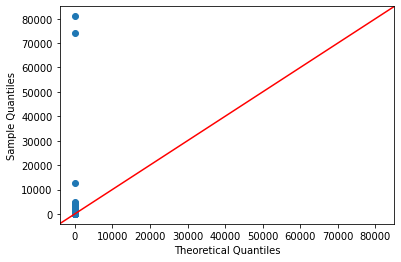

In [14]:
sm.qqplot(df_10['Quantity'], line='45')
pylab.show

*Kesimpulan*: Pada grafik diatas data tidak mengikuti garis/tidak terdistribusi normal.

In [15]:
from scipy.stats import shapiro

In [16]:
# Uji normalitas data pada feature Quantity antar Setiap Product (Normalitas)
norm, pval = shapiro(df_10['Quantity'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


C:\Users\corne\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<function matplotlib.pyplot.show(close=None, block=None)>

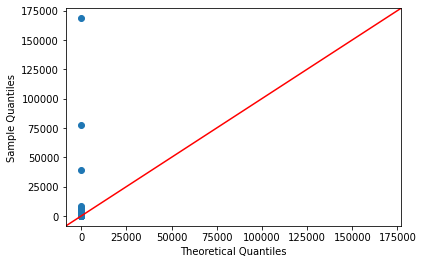

In [17]:
sm.qqplot(df_10['AmountSpent'], line='45')
pylab.show

In [18]:
# Uji normalitas data pada feature Amount Spent antar Setiap Product (Normalitas)
norm, pval = shapiro(df_10['AmountSpent'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


C:\Users\corne\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Uji Analisis Korelasi** <br>

Uji korelasi perbandingan antara  `Quantity` dan `AmountSpent` (Spearman)

**Dasar pengambilan keputusan:**
* Jika nilai Signifikansi < 0.05, maka berkorelasi.
* Jika nilai Signifficansi > 0,05, maka tidak berkorelasi.

**Pedoman Kekuatan Hubungan (Correlation Coefficient)** 
* 0.00 - 0.25 = korelasi sangat lemah.
* 0.26 - 0.50 = korelasi cukup.
* 0.51 - 0.75 = korelasi kuat.
* 0.76 - 0.99 = korelasi sangat kuat. 
* 1.00 = korelasi senipurna. 

**Kriteria Arah Hubungan** 
* Arah korelasi dilihat pada angka correlation coefficient. 
* Besarnya nilai correlation coefficient antara + 1 s/d -1. 
* Nilai correlation coefficient bernilai positif maka hubungan kedua variable searah. 
* Nilai correlation coefficient bernilai negatif, maka hubungan kedua variabel tidak searah. 


In [19]:
df_10[['Quantity', 'AmountSpent']].corr(method='spearman')

,Quantity,AmountSpent
Quantity,1.000000,0.657364
AmountSpent,0.657364,1.000000


**Kesimpulan:**
- Terdapat korelasi antara banyaknya `Quantity` dan` Amount Spent` dari suatu customer.
- Hasil korelasi memiliki kekuatan hubungan kuat, dimana besarnya nilai korelasi berada diangka 0.65.
- Nilai correlation coefficient bernilai positif maka hubungan kedua variable antara `Quantity` dan` Amount Spent` adalah searah

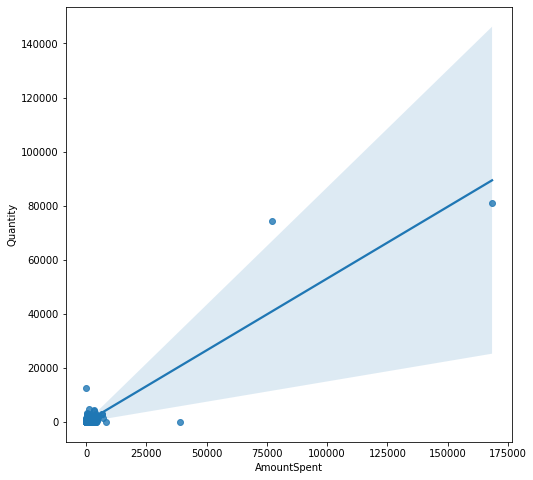

In [20]:
plt.figure(figsize=(8,8))
sns.regplot(x = 'AmountSpent', y='Quantity', data = df_10)
plt.show()

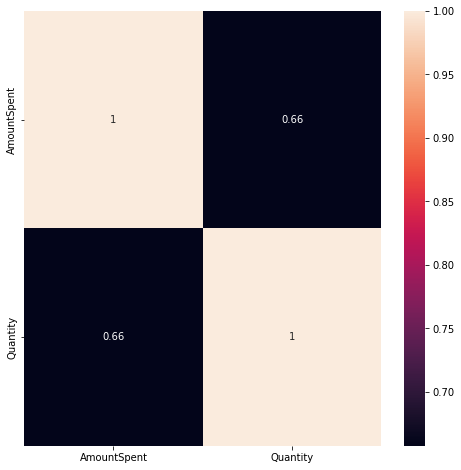

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df_10[['AmountSpent', 'Quantity']].corr('spearman'), annot=True)
plt.show()

# **Exploratory Data Analysis**
- Exploring and analysing the data

***1. Consolidating the number of Sales Made per customer for each country***

In [22]:
# We use InvoiceNo as the count for sales
sales_per_cust = df_10.groupby(by=['CustomerID','CustomerName','Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'CustomerName','Country', "NumberOfSales"]
sales_per_cust.head(10)

,CustomerID,CustomerName,Country,NumberOfSales
4019,17841,Drusy Comer,United Kingdom,7847
1888,14911,Ed Worcester,EIRE,5677
1298,14096,Adore MacNamara,United Kingdom,5111
334,12748,Pavlov Lideard,United Kingdom,4596
1670,14606,Roberto Hantusch,United Kingdom,2700
2185,15311,Barry Gooders,United Kingdom,2379
1698,14646,Janifer Comiam,Netherlands,2080
570,13089,Ciel Earwicker,United Kingdom,1818
699,13263,Salaidh Loudon,United Kingdom,1677
1443,14298,Bethanne Farenden,United Kingdom,1637


***2. Number of Sales for all Customers***

In [23]:
orders = df_10.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()\
                                                                                .rename(columns={'InvoiceNo': 'number_of_sales'})\
                                                                                .sort_values('number_of_sales', ascending=False)\
                                                                                .head()
orders

,CustomerID,Country,number_of_sales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


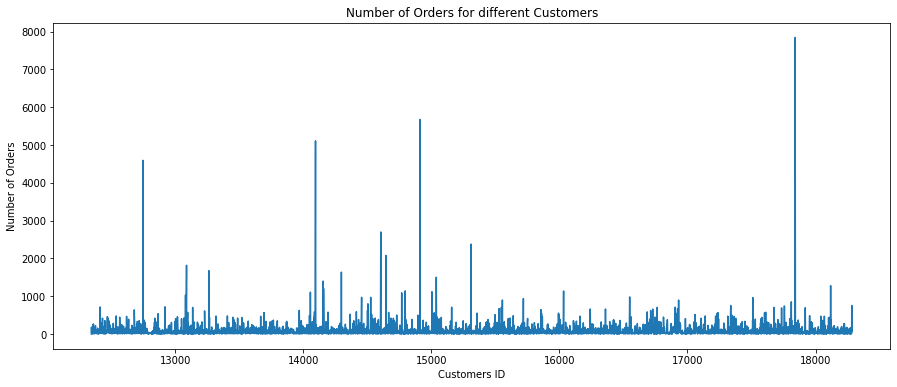

In [24]:
# Visualizing Number of Sales for all Customers
orders = df_10.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

***3. Total Money Spent for all Customer***

In [25]:
money_spent = df_10.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()\
                                                                                .rename(columns={'AmountSpent': 'Total Money Spent'})\
                                                                                .sort_values('Total Money Spent', ascending=False)
money_spent

,CustomerID,Country,Total Money Spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
...,...,...,...
4107,17956,United Kingdom,12.75
3023,16454,United Kingdom,6.90
1802,14792,United Kingdom,6.20
3226,16738,United Kingdom,3.75


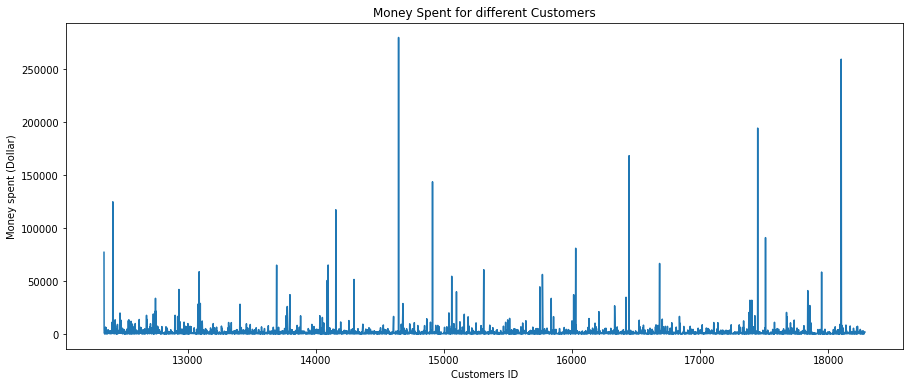

In [26]:
# Visualizing Money Spent for all Customer
money_spent = df_10.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### **Purchasing Patterns**

In [27]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df_10.insert(loc=2, column='year_month', value=df_10['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df_10.insert(loc=5, column='hour', value=df_10.InvoiceDate.dt.hour)

In [28]:
df_10.columns

Index(['InvoiceNo', 'StockCode', 'year_month', 'Description', 'Quantity',
       'hour', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'CustomerName', 'CustomerEmail', 'Gender', 'DateOfBirth', 'Profession',
       'MonthlyIncome', 'EducationalLevel', 'MaritalStatus', 'AmountSpent',
       'Dayname', 'month_year', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter', 'birth_year', 'Age',
       'age_category'],
      dtype='object')

In [29]:
# Check to see if our year_month and hour columns were made
# display(df_10['year_month'].head())
display(df_10['month_year'].head())
display(df_10['hour'].head())

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: month_year, dtype: object

0    8
1    8
2    8
3    8
4    8
Name: hour, dtype: int64

***4. Total number of orders per month***

In [30]:
money_spent = df_10.groupby(by=['InvoiceNo','month_year'], as_index=False)['year_month'].sum()\
                                                                                 .rename(columns={'year_month': 'Total Orders per Month'})\
                                                                                 .sort_values('Total Orders per Month', ascending=False)
money_spent

,InvoiceNo,month_year,Total Orders per Month
16242,576339,2011-11,109002162
17524,579196,2011-11,107192163
18165,580727,2011-12,106388248
17128,578270,2011-11,88891062
15081,573576,2011-10,87482850
...,...,...,...
1246,539410,2010-12,201012
1260,539440,2010-12,201012
313,537035,2010-12,201012
1305,539567,2010-12,201012


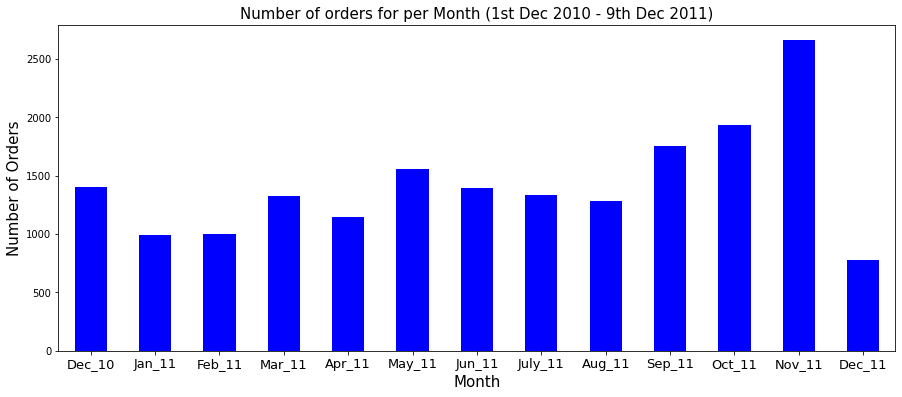

In [31]:
# Create a plot that shows the number of orders per month 
ax = df_10.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color='b',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

***5. number of orders per day of the week***

In [32]:
# Let's see number of orders per day of the week
pd.DataFrame(df_10.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index())

,dayofweek
[1],2863
[2],3185
[3],3455
[4],4033
[5],2831
[7],2169


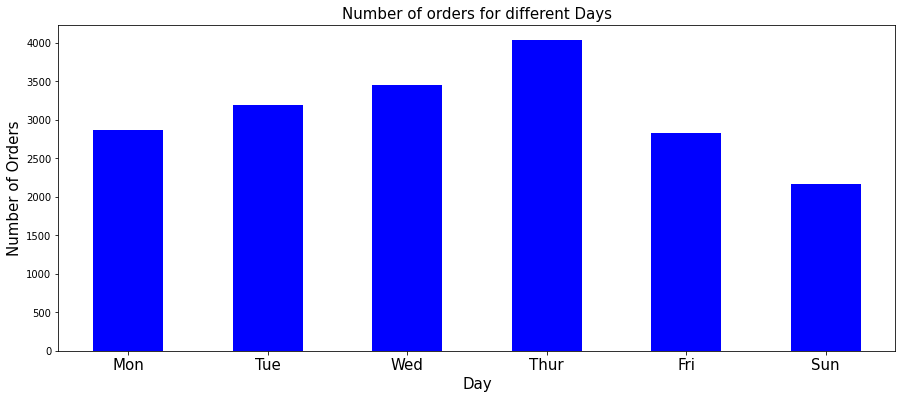

In [33]:
# Create a plot for the above
ax = df_10.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',color='b',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

***7. Number of sales per week of the year***

In [34]:
# number of orders per day of the week
pd.DataFrame(df_10.groupby('InvoiceNo')['weekofyear'].unique().value_counts().sort_index(ascending=False)).head()

,weekofyear
[51],108
[50],401
[49],973
[48],1035
[47],595


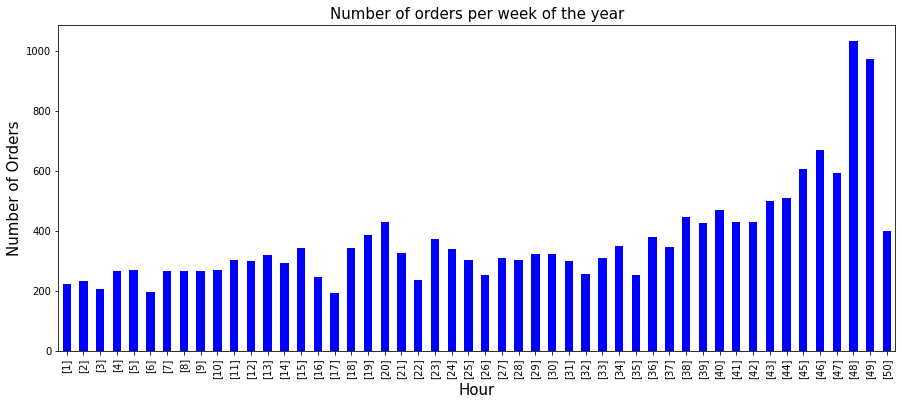

In [35]:
# Number of sales per week of the year
ax = df_10.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color='b',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
# ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)

plt.show()

### **Analyze Unit Prices of our items**

In [36]:
df_10.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

C:\Users\corne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


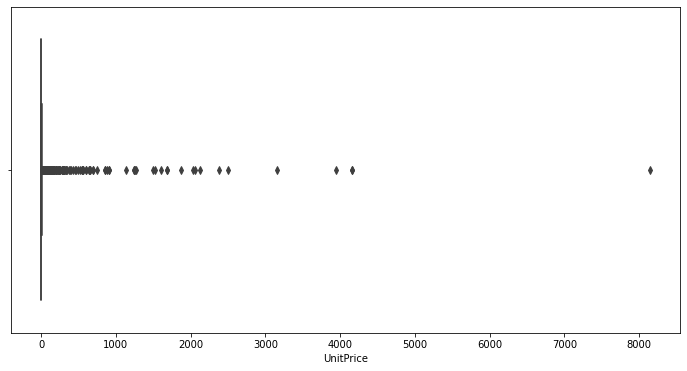

In [37]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_10.UnitPrice)
plt.show()

In [38]:
# What are the free items
df_free = df_10[df_10.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,...,year,month,day,dayofweek,dayofyear,weekofyear,quarter,birth_year,Age,age_category
6914,537197,22841,201012,Round Cake Tin Vintage Green,1,14,2010-12-05 14:02:00,0.0,12647,Germany,...,2010,12,5,7,339,48,4,1957,54,Generation X
22539,539263,22580,201012,Advent Calendar Gingham Sack,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,...,2010,12,16,4,350,50,4,1978,33,Millenials
25379,539722,22423,201012,Regency Cakestand 3 Tier,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,...,2010,12,21,2,355,51,4,1986,25,Millenials
29080,540372,22090,201101,Paper Bunting Retrospot,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,...,2011,1,6,4,6,1,1,1994,17,Generation Z
29082,540372,22553,201101,Plasters In Tin Skulls,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,...,2011,1,6,4,6,1,1,1994,17,Generation Z


In [39]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

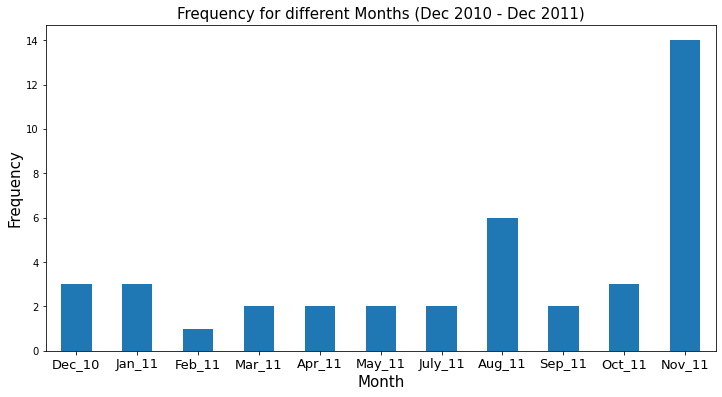

In [40]:
# Ploting the above data
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

Rata-rata, perusahaan ecommerce memberikan 2-4 kali item GRATIS kepada pelanggan setiap bulannya (Kecuali bulan Juni 2011)

### **Analysis per Country**

***8. Number of unique customers in each country***

In [41]:
group_country_orders = df_10.groupby('Country')['InvoiceDate'].count().sort_values(ascending=False)
gco = pd.DataFrame(group_country_orders)
gco = gco.rename(columns = {'InvoiceDate':'Number of Customers'})
gco.head(10)

,Number of Customers
Country,
United Kingdom,354345
Germany,9042
France,8342
EIRE,7238
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1462


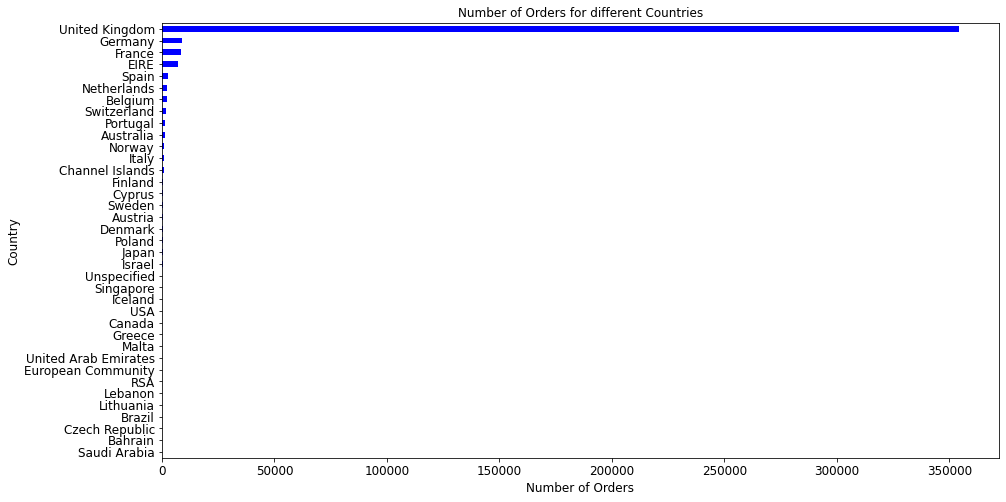

In [42]:
group_country_orders = df_10.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color='b')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

***9. Number of unique customers in each country without United Kingdom***

In [43]:
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

gco_wuk = pd.DataFrame(group_country_orders_without_uk)
gco_wuk = gco_wuk.rename(columns = {'InvoiceDate':'Number of Customers'})
gco_wuk.sort_values(by=['Number of Customers'],ascending=False).head()

,Number of Customers
Country,
Germany,9042
France,8342
EIRE,7238
Spain,2485
Netherlands,2363


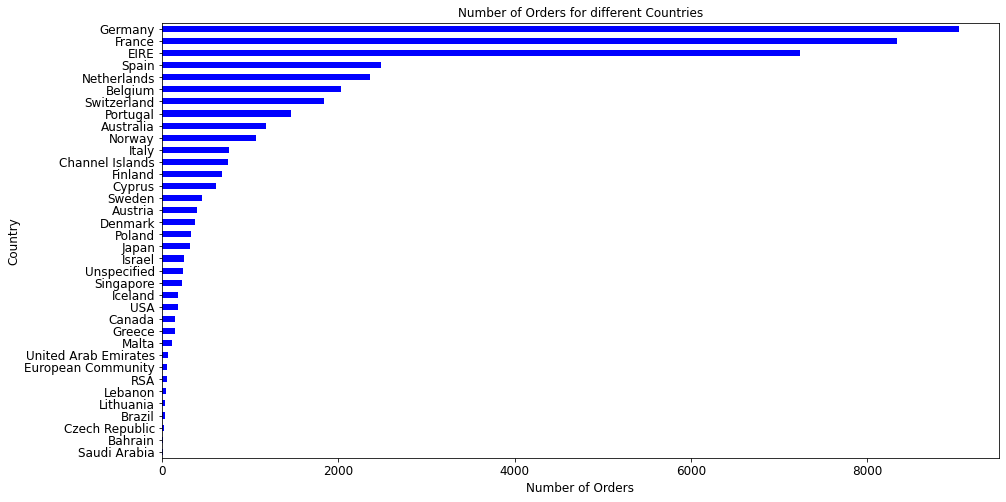

In [44]:
# Excluding UK now
group_country_orders = df_10.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12, color='b')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

***10. Total money spent by each country without United Kingdom***

In [45]:
group_country_amount_spent = df_10.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

gca_wuk = pd.DataFrame(group_country_amount_spent)
gca_wuk = gca_wuk.rename(columns = {'AmountSpent':'Total Money Spent'})
gca_wuk.sort_values(by=['Total Money Spent'],ascending=False).head()

,Total Money Spent
Country,
Netherlands,285446.34
EIRE,265545.90
Germany,228867.14
France,209024.05
Australia,138521.31


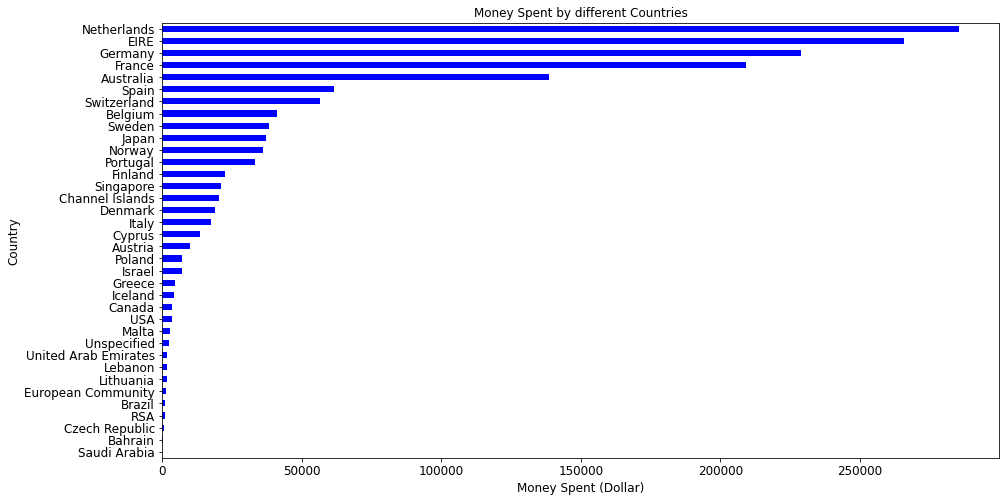

In [46]:
# Amount spent by each country (without UK)
group_country_amount_spent = df_10.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color='b')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

### **Repeat Customers**

***11. What are the data ranges for e-commerce consumers' transactions?***

In [47]:
# Get our date range for our data
print('Date Range: %s to %s' % (df_10['InvoiceDate'].min(), df_10['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df_10 = df_10.loc[df_10['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


***12. Total amount spent per invoice***

In [48]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df_10.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


***12. The largest amount spent of invoices***

In [49]:
# Sort on Amount spent, this gives us the largest invoices
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


***13. The number of unique repeat customers by month***

In [50]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

pd.DataFrame(monthly_repeat_customers_df).sort_values(by=['CustomerID'],ascending=False)

,CustomerID
InvoiceDate,
2011-11-30,541
2011-10-31,324
2011-05-31,281
2011-09-30,272
2010-12-31,263
2011-07-31,227
2011-06-30,220
2011-03-31,203
2011-08-31,198


***14. The number of unique customers per month***

In [51]:
# Number of Unique customers per month
monthly_unique_customers_df = df_10.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
pd.DataFrame(monthly_unique_customers_df).sort_values(by=['CustomerID'],ascending=False)

,CustomerID
InvoiceDate,
2011-11-30,1665
2011-10-31,1364
2011-09-30,1266
2011-05-31,1056
2011-06-30,991
2011-03-31,974
2011-07-31,949
2011-08-31,935
2010-12-31,885


***15. Ratio of Repeat to Unique customers***

In [52]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

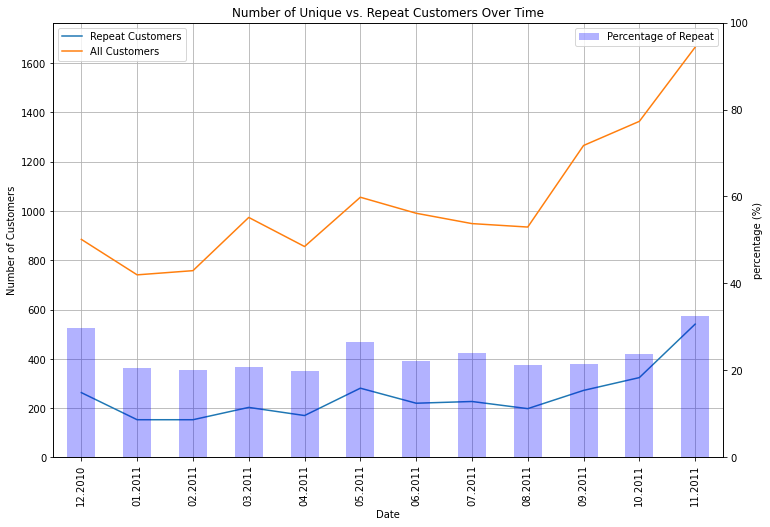

In [53]:
# Plotting this visually
# Note we're using a 2 scale y axis (left and right)

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

***17. the relationship between revenue and repeat customers***

In [54]:
# Let's investigate the relationship between revenue and repeat customers
monthly_revenue_df = df_10.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

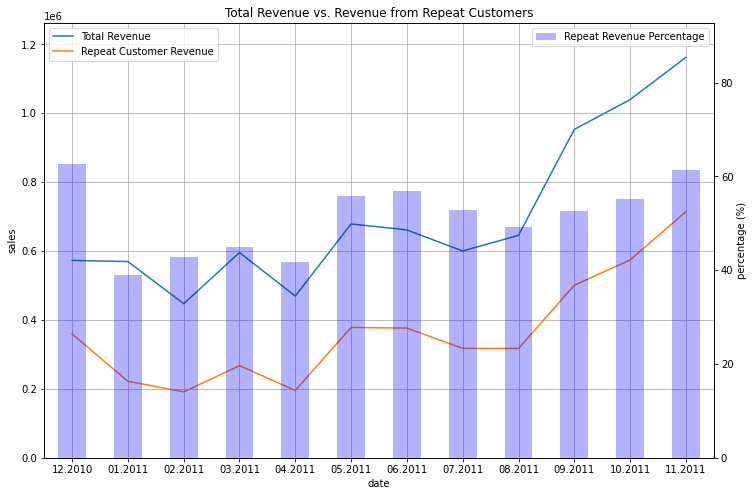

In [55]:
# Now let's plot this information we obtained above
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

### **Item Trends**

***18. The number of items sold for each product for each period.***

In [56]:
# Now let's get quantity of each item sold per month
date_item_df = df_10.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002         224
             10120          16
             10125         143
             10133         123
             10135         366
             11001          65
             15034          38
             15036         132
             15039          17
             16008          14
             16010          12
             16011          94
             16012         120
             16014        1029
             16015          21
Name: Quantity, dtype: int64

***19. Rank items by the last month's sales***

In [57]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,InvoiceDate,StockCode,Quantity
2152,2011-11-30,84826,12551
1530,2011-11-30,23084,12393
790,2011-11-30,22197,8458
701,2011-11-30,22086,5919
2548,2011-11-30,85099B,5678
2158,2011-11-30,84879,5190
1098,2011-11-30,22578,4981
2554,2011-11-30,85123A,4861
1097,2011-11-30,22577,4582
2109,2011-11-30,84077,4500


***21. The top 5 items sale per month***

In [58]:
# Sort the data by stock code
st_23084 = df_10[df_10['StockCode'] == 23084]
st_84826 = df_10[df_10['StockCode'] == 84826]
st_22197 = df_10[df_10['StockCode'] == 22197]
st_22086 = df_10[df_10['StockCode'] == 22086]
st_85099B = df_10[df_10['StockCode'] == '85099B']

# Get unique information
st_23084 = st_23084['Description'].unique()
st_84826 = st_84826['Description'].unique()
st_22197 = st_22197['Description'].unique()
st_22086 = st_22086['Description'].unique()
st_85099B = st_85099B['Description'].unique()

# Change to dataframe
sc_pd = pd.DataFrame({'StockCode':['23084','84826','22197','22086','85099B'],'ProductDescription':[st_23084,st_84826,st_22197,st_22086,st_85099B]})
sc_pd

,StockCode,ProductDescription
0,23084,[Rabbit Night Light]
1,84826,[Asstd Design 3D Paper Stickers]
2,22197,"[Small Popcorn Holder, Popcorn Holder]"
3,22086,[Paper Chain Kit 50'S Christmas ]
4,85099B,[Jumbo Bag Red Retrospot]


In [59]:
# the top 5 items sale per month 
date_item_df = df_10.loc[df_10['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode','Description'])['Quantity'].sum()

pd.DataFrame(date_item_df)

,,,Quantity
InvoiceDate,StockCode,Description,
2010-12-31,85099B,Jumbo Bag Red Retrospot,2056
2011-01-31,85099B,Jumbo Bag Red Retrospot,2625
2011-02-28,85099B,Jumbo Bag Red Retrospot,2971
2011-03-31,85099B,Jumbo Bag Red Retrospot,4924
2011-04-30,85099B,Jumbo Bag Red Retrospot,2211
2011-05-31,85099B,Jumbo Bag Red Retrospot,3470
2011-06-30,85099B,Jumbo Bag Red Retrospot,3529
2011-07-31,85099B,Jumbo Bag Red Retrospot,2970
2011-08-31,85099B,Jumbo Bag Red Retrospot,5278


***22. Monthly trend of each of the top 5 items***

In [60]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,85099B,85099B
InvoiceDate,,
2010-12-31,Jumbo Bag Red Retrospot,2056
2011-01-31,Jumbo Bag Red Retrospot,2625
2011-02-28,Jumbo Bag Red Retrospot,2971
2011-03-31,Jumbo Bag Red Retrospot,4924
2011-04-30,Jumbo Bag Red Retrospot,2211
2011-05-31,Jumbo Bag Red Retrospot,3470
2011-06-30,Jumbo Bag Red Retrospot,3529
2011-07-31,Jumbo Bag Red Retrospot,2970
2011-08-31,Jumbo Bag Red Retrospot,5278


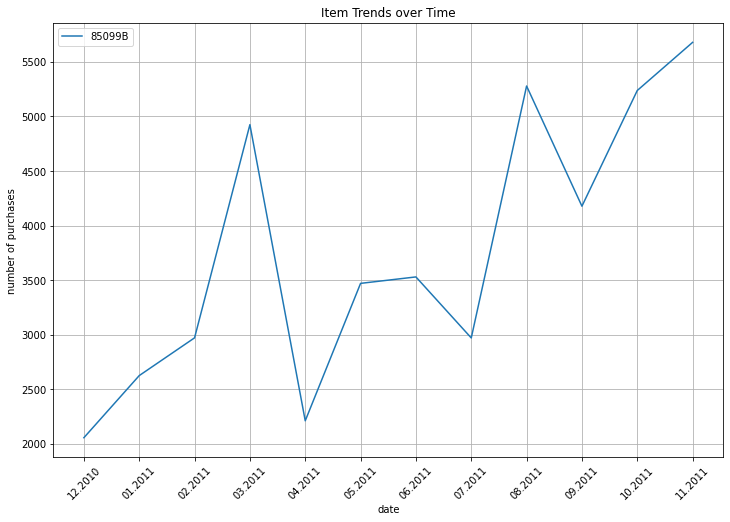

In [61]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()

In [62]:
# # Export to dataset
# df_10.to_excel('df3.xlsx',index=False)